<a href="https://colab.research.google.com/github/clopezv/Challenger_TelecomX/blob/main/TelecomX_LATAM_CLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#7267 rows × 6 columns
df = pd.read_json('/content/TelecomX_Data.json', encoding="utf-8")
#df = pd.DataFrame(data)
#nulos = df['Churn'].isnull().sum()
#print(f' Nulos: {nulos}')
#df.head()
#df = pd.json_normalize(df['customer'])
#df['customerID'] = df['customerID'].astype(str)
#df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})
#df['Churn'].dtype
#df


#🔧 Transformación

In [102]:
CountChurn = df['Churn'].value_counts(dropna=True)
CountChurn

#Clientes que dejaron la empresa 1869 y los que no 5174 y 224 registros que son nulos o vacios


,count
Churn,
0,5398
1,1869


###**Gráfico Churn**

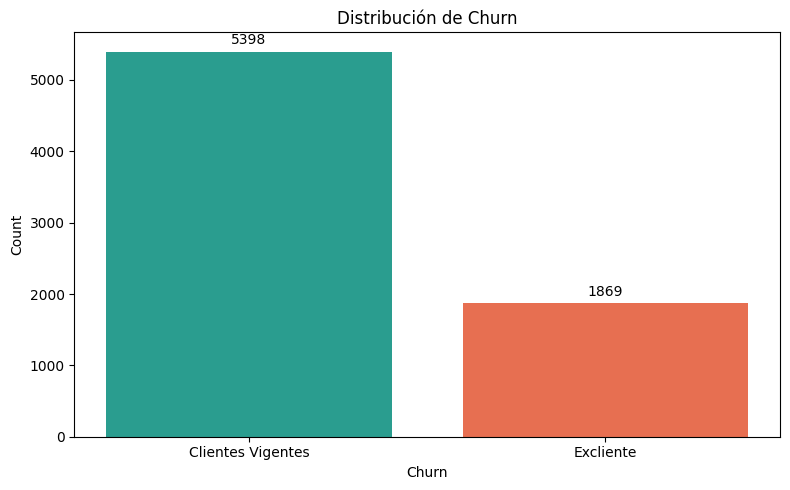

In [121]:
labels = ['Clientes Vigentes', 'Excliente']
counts = [5398, 1869]
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#2a9d8f', '#e76f51']
bars = ax.bar(labels, counts, color=colors)
ax.set_title('Distribución de Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
# Añadir valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
# Mejorar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [106]:
#CountMaleFemale = df['gender'].value_counts(dropna=True)
data = pd.json_normalize(df['customer'])
CountMaleFemale = data['gender'].describe()
CountMaleFemale

#Se encuentran registrados 3675 clientes Masculinos y 3592 Femeninos

,gender
count,7267
unique,2
top,Male
freq,3675


In [79]:
data = pd.json_normalize(df['phone'])
#CountServiciosPhone = data[['PhoneService', 'MultipleLines']].describe()
CountServiciosPhone = data['PhoneService'].value_counts(dropna=True)
CountServiciosPhone
#6560 clientes tienen PhoneService y 707 no tienen el servicio

,count
PhoneService,
Yes,6560
No,707


In [80]:
CountMultipleLinesPhone = data['MultipleLines'].value_counts(dropna=True)
CountMultipleLinesPhone
#3495 clientes no tienen MultipleLines y 3065 si tienen y 707 registran "No phone service"

,count
MultipleLines,
No,3495
Yes,3065
No phone service,707


In [81]:
resultado = df[(data['PhoneService'] == 'Yes') & (data['MultipleLines'] == 'Yes')].shape[0]
resultado
#Existen 3065 clientes que tienen los 2 servicios

3065

In [82]:
resultado = df[(data['PhoneService'] == 'No') & (data['MultipleLines'] == 'No')].shape[0]
resultado
#Existen 0 clientes que tienen "No" en los 2 servicios

0

In [83]:
resultado = df[(data['PhoneService'] == 'No') & (data['MultipleLines'] == 'No phone service')].shape[0]
resultado
#Se confirma que 707 clientes no tienen ningún servicio

707

In [84]:
internet = pd.json_normalize(df['internet'])
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [85]:
CountInternetService = internet['InternetService'].value_counts(dropna=True)
CountInternetService
#3198 clientes tienen internet Fiber optic, 2488 tienen servicio DSL y 1581 no tienen servicio internet
#valores_unicos = pd.unique(df['Columna1'])
#pandas.Series.dt.normalize() para trabajar con fechas

,count
InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [86]:
IDduplicados = df[df.duplicated(subset='customerID', keep=False)]
IDduplicados
#No existen customerID duplicados

,customerID,Churn,customer,phone,internet,account


In [87]:
Account = pd.json_normalize(df['account'])
Account.head()


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [88]:
CountAccount = Account['Contract'].value_counts(dropna=True)
CountAccount
#Contratos de Month-to-month 4005, contratos de Two year 1743 y contratos de One year 1519

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [89]:
PaperlessBilling = Account['PaperlessBilling'].value_counts(dropna=True)
PaperlessBilling
#Total 7.267

,count
PaperlessBilling,
Yes,4311
No,2956


In [90]:
PaymentMethod = Account['PaymentMethod'].value_counts(dropna=True)
PaymentMethod
#Total 7.267

,count
PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [91]:
#ChargesMonthly = Account['Charges.Monthly'].value_counts(dropna=True)
#ChargesMonthly
ChargesMonthly = Account['Charges.Monthly'].describe()
ChargesMonthly
#ChargesMonthly = Account['Charges.Monthly'].max()
#ChargesMonthly
#ChargesMonthly = Account['Charges.Monthly'].min()
#ChargesMonthly

,Charges.Monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


In [92]:
#ChargesTotal = Account['Charges.Total'].describe()
#ChargesTotal
#ChargesTotal = Account['Charges.Total'].max() #999.9
#ChargesTotal
#ChargesTotal = Account['Charges.Total'].min() #
#ChargesTotal
#ChargesTotal = Account['Charges.Total'].value_counts(dropna=True)
#ChargesTotal
#ChargesTotal = Account['Charges.Total'].isnull().sum()
#ChargesTotal
#ChargesTotal = Account['Charges.Total'].astype(float)
#ChargesTotal = ChargesTotal.str.replace(' ', '')
#ChargesTotal
#filas_con_espacios = df[Account['Charges.Total'].str.contains(r'\s', na=False)]
#filas_con_espacios = Account['Charges.Total'].str.contains(r'\s', na=False)
#filas_con_espacios = df[Account['Charges.Total'].str.contains(r'\s', na=False)]
#resultado = df[filas_con_espacios[['customerID', 'Charges.Total']]]
###filas_con_espacios
####print(Account.columns)
#New código
#change_cero = df[Account['Charges.Total'].str.replace(r'\s+', '0', regex=True)]
#change_cero
#change_cero = df[Account['Charges.Total'].str.contains(r'\s', '0', regex=True)]
#change_cero
#change_cero.to_csv('check_cambio.csv', index=False)

#internet = pd.json_normalize(df['internet'])
#change_cero
#filas_con_espacios = df[Account['Charges.Total'].str.contains(r'\s', na=False
##Fin
filas_con_espacios = df[Account['Charges.Total'].str.contains(r'\s', na=False)]
resultado = filas_con_espacios['customerID']
resultado

####Estos clientes tienen el campo Charges.Total en blanco

,customerID
975,1371-DWPAZ
1775,2520-SGTTA
1955,2775-SEFEE
2075,2923-ARZLG
2232,3115-CZMZD
2308,3213-VVOLG
2930,4075-WKNIU
3134,4367-NUYAO
3203,4472-LVYGI
4169,5709-LVOEQ


In [93]:

ChargesDaily = Account['Charges.Monthly'] / 30
ChargesDaily
df['Cuentas_Diarias'] = ChargesDaily
df.head()
#Creación de columna cuentas diarias

,customerID,Churn,customer,phone,internet,account,Cuentas_Diarias
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",2.186667
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",1.996667
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",2.463333
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",3.266667
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",2.796667


In [94]:
#convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0)
df['Churn'] = df['Churn'].fillna('No')  # si son NaN (valores nulos)
df['Churn'] = df['Churn'].replace(r'^\s*$', 'No', regex=True)  # si son strings vacíos o con espacios
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(int)
CountChurn = df['Churn'].value_counts(dropna=True)
CountChurn

#df[Account['Charges.Total'].str.contains(r'\s', '0', regex=True)]
#df['Churn'] = df['Churn'].map({'No': '\s'})
#CountChurn = df['Churn'].value_counts(dropna=True)
#CountChurn

#df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
#df.head()

<ipython-input-94-324579e6c2b9>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


,count
Churn,
0,5398
1,1869


In [95]:
data = pd.json_normalize(df['customer'])
data


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [96]:
data[['Partner', 'Dependents']]

,Partner,Dependents
0,Yes,Yes
1,No,No
2,No,No
3,Yes,No
4,Yes,No
...,...,...
7262,No,No
7263,Yes,No
7264,No,No
7265,Yes,Yes


In [97]:
#convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0)
for col in [['Partner', 'Dependents']]:
    #print(col)
    data[col] = data[col].fillna('No')  # si son NaN (valores nulos)
    data[col] = data[col].replace(r'^\s*$', 'No', regex=True)  # si son strings vacíos o con espacios
    data[col] = data[col].replace({'Yes': 1, 'No': 0})
    data[col] = data[col].astype(int)
data[['Partner', 'Dependents']]

<ipython-input-97-bf2f55638b81>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'Yes': 1, 'No': 0})


,Partner,Dependents
0,1,1
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
7262,0,0
7263,1,0
7264,0,0
7265,1,1


In [98]:
#convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0)
data = pd.json_normalize(df['phone'])
#data
for col in [['PhoneService', 'MultipleLines']]:
    data[col] = data[col].fillna('No')  # si son NaN (valores nulos)
    data[col] = data[col].replace(r'^\s*$', 'No', regex=True)  # si son strings vacíos o con espacios
    data[col] = data[col].replace({'Yes': 1, 'No': 0})
    #data[col] = data[col].astype(int)
data[['PhoneService', 'MultipleLines']]

<ipython-input-98-41e1f574de71>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'Yes': 1, 'No': 0})


,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0
...,...,...
7262,1,0
7263,1,1
7264,1,0
7265,1,0


In [99]:
#convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0)
data = pd.json_normalize(df['internet'])
for col in [['OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]:
    data[col] = data[col].fillna('No')  # si son NaN (valores nulos)
    data[col] = data[col].replace(r'^\s*$', 'No', regex=True)  # si son strings vacíos o con espacios
    data[col] = data[col].replace({'Yes': 1, 'No': 0})
    #data[col] = data[col].astype(int)
data[['OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,1,0,1,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,1,1,0,1,1
4,0,0,0,1,1,0
...,...,...,...,...,...,...
7262,1,0,0,1,0,0
7263,0,0,0,0,0,1
7264,0,1,0,0,0,0
7265,1,0,1,1,0,1


In [100]:
#convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0)
data = pd.json_normalize(df['account'])
#data['PaperlessBilling']
data['PaperlessBilling'] = data['PaperlessBilling'].fillna('No')  # si son NaN (valores nulos)
data['PaperlessBilling'] = data['PaperlessBilling'].replace(r'^\s*$', 'No', regex=True)  # si son strings vacíos o con espacios
data['PaperlessBilling'] = data['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].astype(int)
data['PaperlessBilling']

<ipython-input-100-5075587abe38>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['PaperlessBilling'] = data['PaperlessBilling'].replace({'Yes': 1, 'No': 0})


,PaperlessBilling
0,1
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,1
7265,0


In [110]:
#Análisis descriptivo
AnalisisChurn = df['Churn'].describe()
AnalisisChurn

,Churn
count,7267.000000
mean,0.257190
std,0.437115
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [113]:
#Análisis descriptivo
AnalisisCustomer = pd.json_normalize(df['customer']).describe()
AnalisisCustomer

,SeniorCitizen,tenure
count,7267.000000,7267.000000
mean,0.162653,32.346498
std,0.369074,24.571773
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [112]:
#Análisis descriptivo
AnalisisCustomer = pd.json_normalize(df['phone']).describe()
AnalisisCustomer

,PhoneService,MultipleLines
count,7267,7267
unique,2,3
top,Yes,No
freq,6560,3495


In [114]:
#Análisis descriptivo
AnalisisInternet = pd.json_normalize(df['internet']).describe()
AnalisisInternet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7267,7267,7267,7267,7267,7267,7267
unique,3,3,3,3,3,3,3
top,Fiber optic,No,No,No,No,No,No
freq,3198,3608,3182,3195,3582,2896,2870


In [117]:
#Análisis descriptivo
AnalisisAccount = pd.json_normalize(df['account']).describe()
AnalisisAccount

,Charges.Monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


#📊 Carga y análisis

#📄Informe final